In [1]:
import sys
assert sys.version_info >=(3,7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__)>=version.parse("1.0.1")


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
X,y = mnist["data"],mnist["target"]
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y.shape

(70000,)

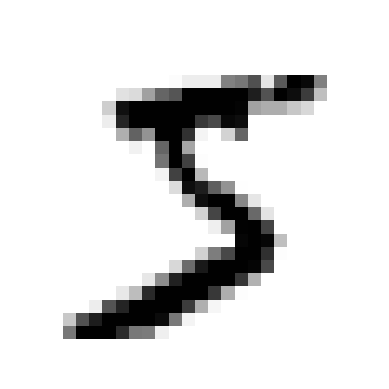

In [12]:
#that means 70000 pictures with 784 features, its the pixel intensity
#28*28=784


import matplotlib.pyplot as plt
import numpy as np

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# Assuming X is a DataFrame, use .iloc for integer-based indexing
some_digit = X.iloc[0].values  # .values to get it as a NumPy array

plot_digit(some_digit)

# Ensure save_fig is defined somewhere in your code or remove this line if not needed
# save_fig("some_digit_plot")

plt.show()


In [13]:
y[0]

'5'

In [14]:
#cast y from str to values
y = y .astype(np.uint8)

In [15]:
y[0]

5

In [23]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [24]:
#one digit detector, 5 and not 5

y_train_5 = (y_train ==5)
y_test_5 = (y_test==5)


In [25]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_5)
#this is relies on randomness


SGDClassifier()

In [26]:
sgd_clf.predict([some_digit])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [ ]:
Performance Measure

In [40]:
#using cros validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import numpy as np
import pandas as pd

# Assuming X_train and y_train_5 are DataFrames, convert them to NumPy arrays
X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train_5_np = y_train_5.values if isinstance(y_train_5, pd.DataFrame) else y_train_5

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Add shuffle=True for random splits

for train_index, test_index in skfolds.split(X_train_np, y_train_5_np):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train_np[train_index]
    y_train_folds = y_train_5_np[train_index]
    X_test_fold = X_train_np[test_index]
    y_test_fold = y_train_5_np[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))


0.9388
0.9664
0.96355


In [32]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91995, 0.95055, 0.9608 ])

In [41]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [42]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
Confusion Matrix

In [44]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

#clean prediction on each folds

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[52759,  1820],
       [ 1136,  4285]])

In [ ]:
confusion matrix, 52759 mean they were correctly classfied as non-5s true negative
1820 was wrongly classfied as 5s false positive, 1136 was wrongly classfied as non 5s
false negative, 4285 is correctly classfied as 5s, true positive

In [46]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [ ]:
perfect classifer will only have true positives and true negatives,
percision formula is TP/(TP+FP)
sensitivity formula TP/(TP+FN)

In [48]:
from sklearn.metrics import precision_score,recall_score
precision_score = (y_train_5,y_train_pred)
print(precision_score)

(0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool, array([ True, False, False, ...,  True, False, False]))


In [49]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.743536352594135

In [50]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([1499.66280729])

In [55]:
threshold =8000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [56]:
y_scores = cross_val_predict (sgd_clf,X_train,y_train_5,cv=3,method="decision_function')
                              

SyntaxError: EOL while scanning string literal (2676996814.py, line 1)

In [57]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                                 method="decision_function")


In [62]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

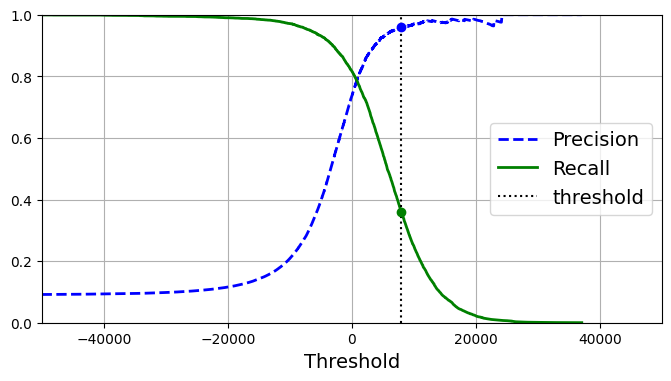

In [66]:

plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

In [69]:
threshold_90_precision = thresholds[np.argmax(precisions>0.9)]
threshold_90_precision

3682.7346670195875

In [70]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [74]:

from sklearn.metrics import precision_score
precision_score(y_train_5, y_train_pred_90)

0.9002350483154871

In [75]:
from sklearn.metrics import recall_score
recall_score(y_train_5,y_train_pred_90)

0.6358605423353625

In [77]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

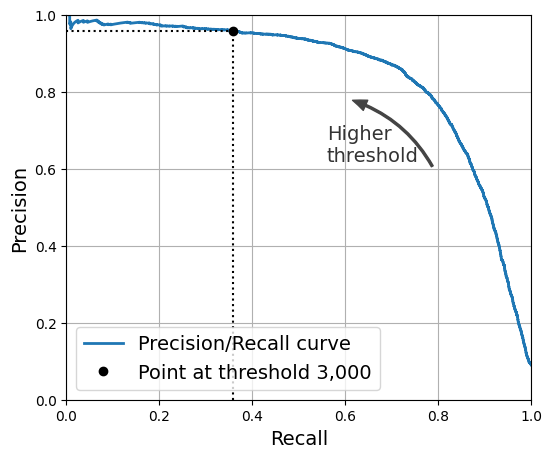

In [79]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")


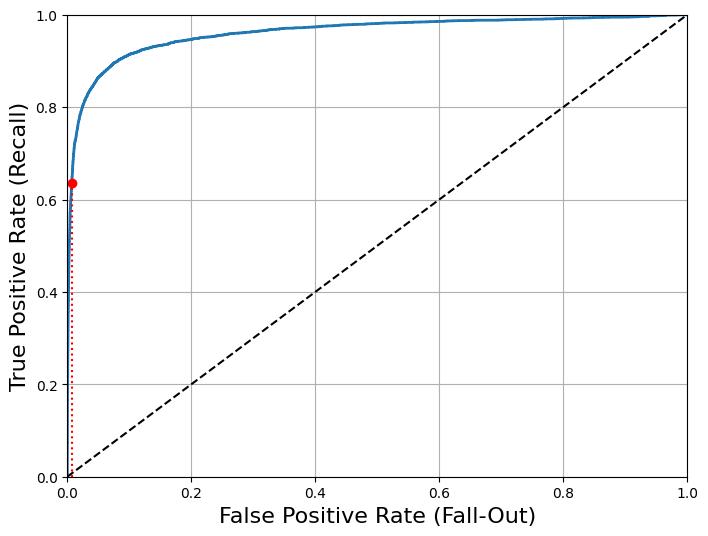

In [90]:
idx_for_threshold_at_90 = (thresholds <= threshold_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
                                   # Not shown
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9609435149114217

In [84]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train , y_train_5, cv=3, method = "predict_proba")

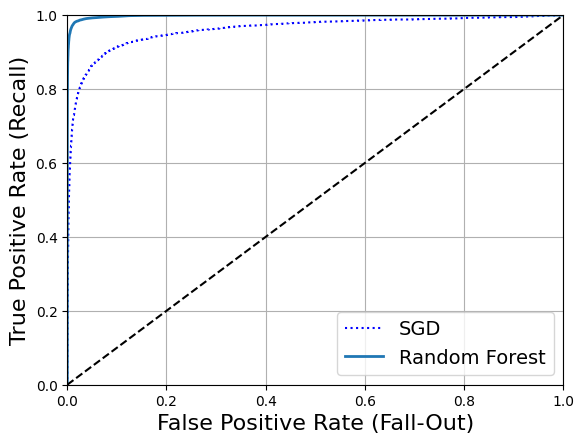

In [91]:
#to plot you will need the score not probabilities, you can use positive class porab

y_scores_forest = y_probas_forest[:,1] #proba of positive class
fpr_forest, tpr_forest, threholds_forest = roc_curve(y_train_5,y_scores_forest)
plt.plot (fpr,tpr,"b:",label ="SGD")
plot_roc_curve (fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [92]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [93]:
from sklearn.svm import SVC
svm_clf= SVC(gamma="auto",random_state=42)
svm_clf.fit(X_train[:1000],y_train[:1000])
svm_clf.predict([some_digit])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [96]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [97]:
np.argmax(some_digit_scores)

5

In [99]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [100]:
svm_clf.classes_[5]

5

In [104]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf =  OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [105]:
len(ovo_clf.estimators_)

45

In [106]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [107]:
forest_clf.predict_proba([some_digit])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [108]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")


array([0.8823 , 0.8765 , 0.87735])

In [115]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5597,    0,   24,    6,    9,   53,   37,    6,  190,    1],
       [   0, 6415,   40,   24,    5,   47,    4,    8,  184,   15],
       [  28,   29, 5287,   94,   72,   27,   65,   41,  303,   12],
       [  25,   18,  126, 5248,    2,  224,   27,   42,  343,   76],
       [  10,   16,   51,   12, 5230,   12,   39,   26,  269,  177],
       [  27,   17,   34,  175,   52, 4515,   79,   17,  439,   66],
       [  31,   14,   44,    2,   42,   96, 5574,    3,  111,    1],
       [  18,   10,   54,   31,   52,   12,    3, 5721,  142,  222],
       [  18,   68,   49,   87,    3,  134,   29,   11, 5402,   50],
       [  23,   20,   31,   68,  122,   38,    1,  181,  275, 5190]])

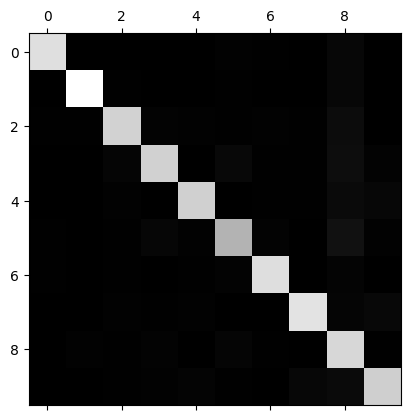

In [116]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

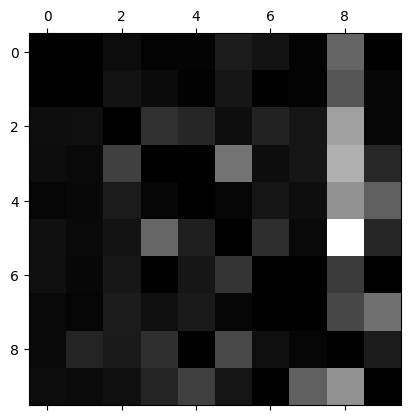

In [118]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [ ]:
row mean the actual class, column means the predictied class, the column of 8s is
very bright, which means many of of 8s are miss classified, (i.e other number classfied to be 8s) 
the 8s row looks good( precision) 

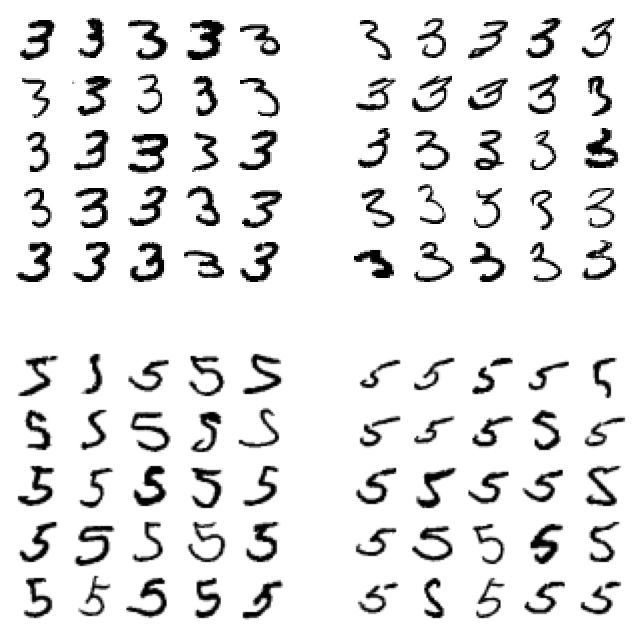

In [120]:
cl_a,cl_b=3,5
X_aa = X_train[(y_train==cl_a) &(y_train_pred == cl_a)]
X_ab=X_train[(y_train==cl_a)&(y_train_pred == cl_b)]
X_bb = X_train[(y_train==cl_b) &(y_train_pred == cl_b)]
X_ba=X_train[(y_train==cl_b)&(y_train_pred == cl_a)]

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


In [121]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >=7)
y_train_odd = (y_train %2 ==1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)
knn_clf.predict([some_digit])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [122]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.9764102655606048

In [123]:


noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:

some_index = 5
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])

plt.show()

In [ ]:


knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
